In [54]:
from pylab import *
%matplotlib inline

In [129]:
def rk4_a(ec,p_ini,x,args=0,h=0.001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

In [126]:
def mov(x_v,t,a_b_g):

    rpa = sqrt(x_v[0]**2 + (x_v[1]-a_b_g[0])**2)
    rpb = sqrt(x_v[0]**2 + (x_v[1]-a_b_g[1])**2)
    
    dxp,dyp = x_v[2],x_v[3]
    dvxp = a_b_g[2]*x_v[0]/(rpa**3) + a_b_g[2]*x_v[0]/(rpb**3)
    dvyp = a_b_g[2]*(x_v[1]-a_b_g[0])/(rpa**3) + a_b_g[2]*(x_v[1]-a_b_g[1])/(rpb**3)
    
    return array([dxp,dyp,dvxp,dvyp])
    

KeyboardInterrupt: 

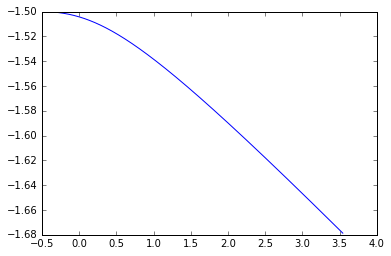

In [127]:
particulas = 120
a_b_g = [0.5,-0.5,0.5]
med = 4
err = 5e-1
graph = zeros(particulas)
for i in arange(particulas):
    p_ini = [-0.5,0.025*i - 1.5,4,0]
    t,r = rk4_a(mov,p_ini,[0,1],a_b_g)
    
    
    plot(r[:,0],r[:,1])
plot([0],[a_b[0]],'o',color='yellow',markersize=5)
plot([0],[a_b[1]],'o',color='yellow',markersize=5)
xlim(-1,4)
ylim(-3,3)
show()

for m in arange(len(graph)):
    plot([0],graph[m],'.',markersize=3)

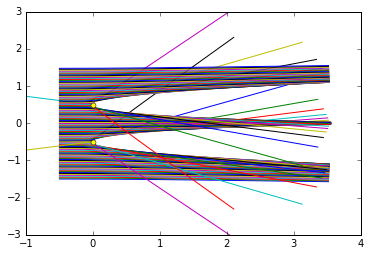

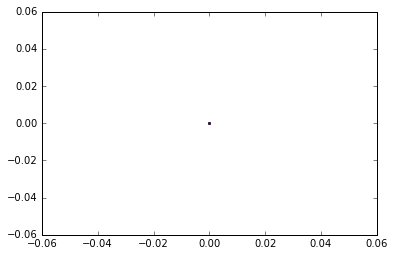

In [6]:
particulas = 120
a_b = [0.5,-0.5,0.2]
med = 4
err = 5e-1
graph = zeros(particulas)

for i in arange(particulas):
    p_ini = [-0.5,0.025*i - 1.5,4,0]
    t,r = rk4_a(mov,p_ini,[0,1],a_b)
    
    
    plot(r[:,0],r[:,1])
plot([0],[a_b[0]],'o',color='yellow',markersize=5)
plot([0],[a_b[1]],'o',color='yellow',markersize=5)
xlim(-1,4)
ylim(-3,3)
show()

for m in arange(len(graph)):
    plot([0],graph[m],'.',markersize=3)

In [135]:
def rutherford(p,a_b_g,N,pantalla):
    trayectoria = zeros((N,len(p)))
    trayectoria[0,:] = p
    mi_dt = .005
    n = 0
    pantalla2 = pantalla**2
    
    for i in range(N-1):
        t,sol_dt = rk4_a(mov,trayectoria[i,:],[0,mi_dt],a_b_g)
        if (sol_dt[-1,0]**2 + sol_dt[-1,1]**2) > pantalla2:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(mov,trayectoria[i,:],[0,dt_busqueda],a_b_g)
            y_med = sol[-1,:]
            while abs((y_izq[0]**2 + y_izq[1]**2) - pantalla2) > 1e-2:
                if ((y_izq[0]**2 + y_izq[1]**2) - pantalla2)*((y_med[0]**2 + y_med[1]**2) - pantalla2) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(mov,reinicio,[0,dt_busqueda],a_b_g)
                y_izq = reinicio
                y_med = sol[-1,:]
                trayectoria[i+1,:] = sol[-1,:]
            break
                
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]
            n += 1 
    
    menos = N-n
    trayectoria = trayectoria[0:-menos]
    
    
    return trayectoria
        

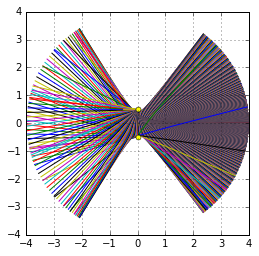

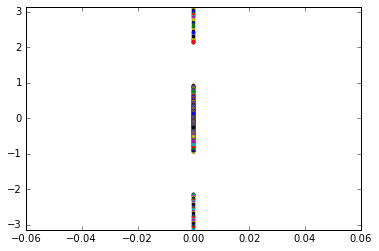

[   3.    3.    3.    4.    5.    2.    3.    2.    2.    2.    2.    3.
    2.    3.    4.    9.    2.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   15.
    9.   10.    9.   10.   10.   12.   15.   17.   22.   29.   37.   55.
   81.  116.  115.   81.   55.   37.   29.   22.   17.   15.   12.   10.
   10.    9.   10.    9.   15.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    2.
    9.    4.    3.    2.    3.    2.    2.    2.    2.    2.    2.    5.
    4.    3.    3.    3.]


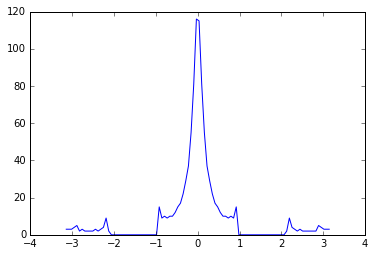

In [160]:
a_b_g = [0.5,-0.5,0.8]
particulas = 1000
graph = zeros(particulas)
radio = 4

for i in range(particulas):
    p_ini = [-0.5,((1./particulas)*i)-0.5,4,0]
    trayectoria = rutherford(p_ini,a_b_g,300,radio)
    plot(trayectoria[:,0],trayectoria[:,1])
    if trayectoria[-1,0] > 0:
        graph[i] = arcsin(trayectoria[-1,1]/radio)
    elif trayectoria[-1,0] < 0 and trayectoria[-1,1] > 0:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) + pi
        
    else:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) - pi

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-4,4)
ylim(-4,4)
grid(True)
axes().set_aspect('equal')
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-pi,pi)
show()

division = 100
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
print n

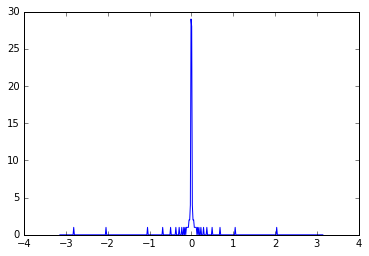

In [166]:
division = 400
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
#print n

# Completo radio 3

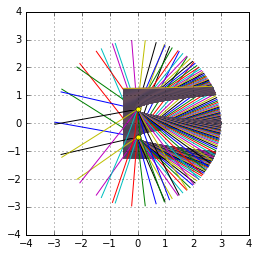

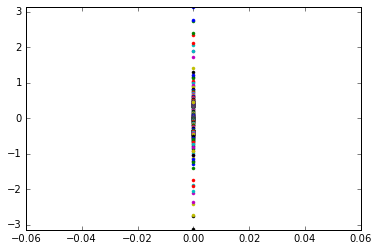

[   1.    0.    0.    0.    0.    0.    2.    0.    0.    0.    0.    1.
    1.    0.    0.    0.    1.    1.    0.    1.    1.    0.    1.    0.
    0.    0.    0.    1.    0.    1.    2.    1.    1.    2.    1.    2.
    3.    2.    3.    4.    5.    7.   35.  117.  124.    3.    5.    6.
   12.  154.  153.   12.    6.    5.    3.  124.  117.   34.    7.    5.
    4.    3.    2.    3.    2.    1.    2.    1.    1.    2.    1.    0.
    1.    0.    0.    0.    0.    1.    0.    1.    1.    0.    1.    1.
    0.    0.    0.    1.    1.    0.    0.    0.    0.    2.    0.    0.
    0.    0.    0.    1.]


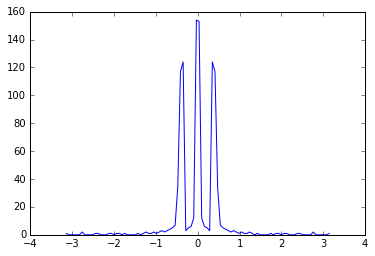

In [175]:
a_b_g = [0.5,-0.5,0.2]
particulas = 1000
graph = zeros(particulas)
radio = 3

for i in range(particulas):
    p_ini = [-0.5,((2.5/particulas)*i)-1.25,4,0]
    trayectoria = rutherford(p_ini,a_b_g,300,radio)
    plot(trayectoria[:,0],trayectoria[:,1])
    if trayectoria[-1,0] > 0:
        graph[i] = arcsin(trayectoria[-1,1]/radio)
    elif trayectoria[-1,0] < 0 and trayectoria[-1,1] > 0:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) + pi
        
    else:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) - pi

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-4,4)
ylim(-4,4)
grid(True)
axes().set_aspect('equal')
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-pi,pi)
show()

division = 100
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
print n

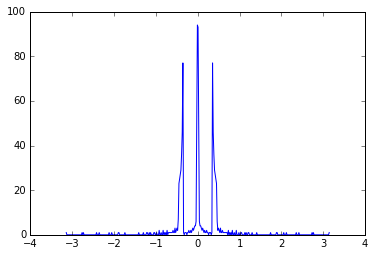

In [179]:
division = 400
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
#print n

# Completo radio 4

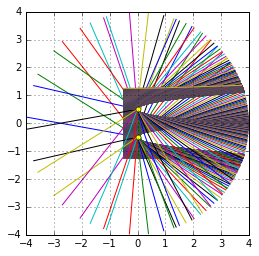

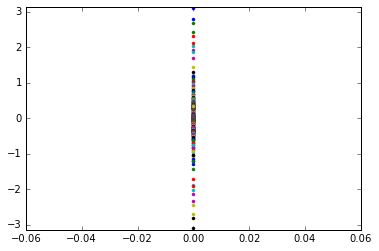

[   1.    0.    0.    0.    0.    1.    0.    1.    0.    0.    0.    1.
    0.    1.    0.    0.    1.    1.    0.    1.    1.    0.    1.    0.
    0.    0.    0.    1.    0.    1.    2.    1.    1.    2.    1.    2.
    2.    3.    2.    3.    5.    6.    8.   13.   95.  169.    5.    8.
   16.  145.  144.   16.    8.    5.  169.   94.   13.    8.    6.    5.
    3.    2.    3.    2.    2.    1.    2.    1.    1.    2.    1.    0.
    1.    0.    0.    0.    0.    1.    0.    1.    1.    0.    1.    1.
    0.    0.    1.    0.    1.    0.    0.    0.    1.    0.    1.    0.
    0.    0.    0.    1.]


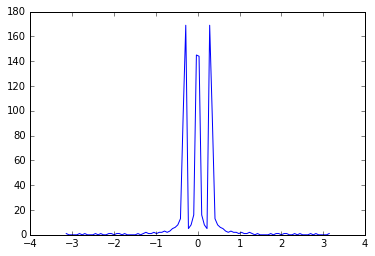

In [180]:
a_b_g = [0.5,-0.5,0.2]
particulas = 1000
graph = zeros(particulas)
radio = 4

for i in range(particulas):
    p_ini = [-0.5,((2.5/particulas)*i)-1.25,4,0]
    trayectoria = rutherford(p_ini,a_b_g,300,radio)
    plot(trayectoria[:,0],trayectoria[:,1])
    if trayectoria[-1,0] > 0:
        graph[i] = arcsin(trayectoria[-1,1]/radio)
    elif trayectoria[-1,0] < 0 and trayectoria[-1,1] > 0:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) + pi
        
    else:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) - pi

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-4,4)
ylim(-4,4)
grid(True)
axes().set_aspect('equal')
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-pi,pi)
show()

division = 100
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
print n

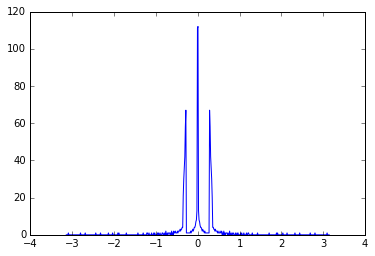

In [182]:
division = 500
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
#print n

# Radio completo 5

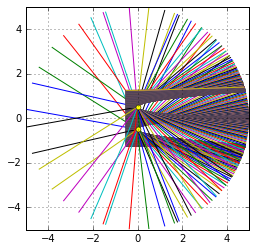

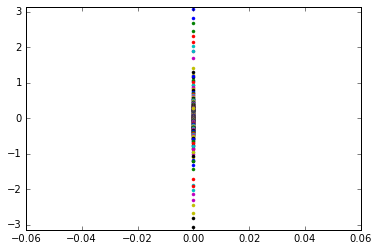

[   0.    1.    0.    0.    0.    1.    0.    1.    0.    0.    1.    0.
    0.    1.    0.    1.    0.    1.    0.    2.    0.    0.    1.    0.
    0.    0.    0.    1.    0.    1.    1.    2.    1.    2.    1.    1.
    3.    2.    3.    3.    4.    6.    6.   11.   19.  145.  112.   10.
   19.  138.  137.   19.   10.  112.  144.   19.   11.    6.    6.    4.
    3.    3.    2.    3.    1.    1.    2.    1.    2.    1.    1.    0.
    1.    0.    0.    0.    0.    1.    0.    0.    2.    0.    1.    0.
    1.    0.    1.    0.    0.    1.    0.    0.    1.    0.    1.    0.
    0.    0.    1.    0.]


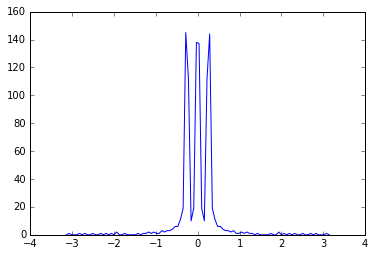

In [183]:
a_b_g = [0.5,-0.5,0.2]
particulas = 1000
graph = zeros(particulas)
radio = 5

for i in range(particulas):
    p_ini = [-0.5,((2.5/particulas)*i)-1.25,4,0]
    trayectoria = rutherford(p_ini,a_b_g,300,radio)
    plot(trayectoria[:,0],trayectoria[:,1])
    if trayectoria[-1,0] > 0:
        graph[i] = arcsin(trayectoria[-1,1]/radio)
    elif trayectoria[-1,0] < 0 and trayectoria[-1,1] > 0:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) + pi
        
    else:
        graph[i] = -arcsin(trayectoria[-1,1]/radio) - pi

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-5,5)
ylim(-5,5)
grid(True)
axes().set_aspect('equal')
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-pi,pi)
show()

division = 100
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
print n

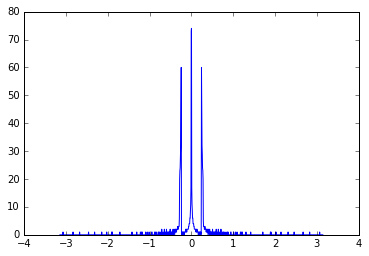

In [186]:
division = 1000
n = zeros(division)
for l in range(division):
    for ii in range(particulas):
        if (2*l*(pi/division))-pi <= graph[ii] <(2*(l+1)*(pi/division))-pi:
            n[l] += 1

        else:
            n[l] += 0
            
y = linspace(-pi,pi,division)
plot(y,n)
#print n

In [83]:
a = zeros((6,4))
a[0,0] = 1 
a[1,0]=2
a[2,0]=3
a[3,0]=4
a[4,0]=5
a[5,0]=6
a = a[1:-2]

print a

[[ 2.  0.  0.  0.]
 [ 3.  0.  0.  0.]
 [ 4.  0.  0.  0.]]


In [209]:
a = linspace(-1,1)
print a

[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]


In [8]:
len(linspace(-1,1,50))

50

In [17]:
nn = zeros(3)
for i in arange(3):
    nn[i] += 1
print nn

[ 1.  1.  1.]


In [38]:
range(2)

[0, 1]

In [70]:
division = 10
n = zeros(1)
k = 1.

a = ((2*(k+1))/(division)) -1
print a

-0.6


In [78]:
5.7/8.7

0.6551724137931035

In [58]:
a = zeros((5,7))
print a

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
